<a href="https://colab.research.google.com/github/joebutler1966/03212024/blob/main/0702.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install jupyterlab


Text(value='QQQ', description='Ticker:')

Text(value='2023-01-01', description='Start Date:')

Text(value='2024-07-01', description='Prediction Date:')

Button(description='Predict', style=ButtonStyle())

[*********************100%%**********************]  1 of 1 completed


Predicted high for the day after 2024-07-01: 548.5028337751116
Predicted low for the day after 2024-07-01: 539.9371076311384


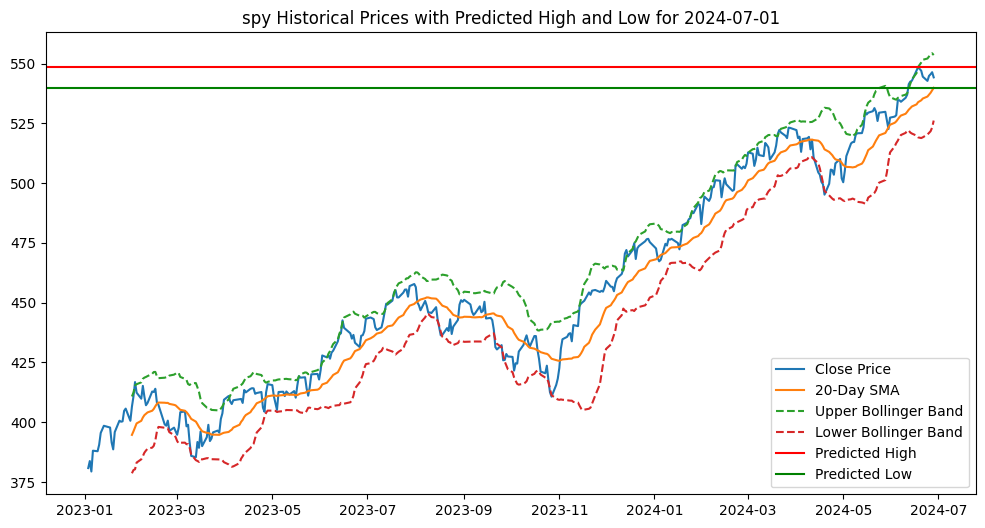

In [2]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

ticker_input = widgets.Text(value='QQQ', description='Ticker:')
start_date_input = widgets.Text(value='2023-01-01', description='Start Date:')
prediction_date_input = widgets.Text(value='2024-07-01', description='Prediction Date:')
button = widgets.Button(description='Predict')

display(ticker_input, start_date_input, prediction_date_input, button)

def predict_high_low(ticker, start_date, prediction_date):
    data = yf.download(ticker, start=start_date, end=prediction_date)
    data['Return'] = data['Close'].pct_change()
    data['SMA20'] = data['Close'].rolling(window=20).mean()
    data['SMA50'] = data['Close'].rolling(window=50).mean()
    data['StdDev'] = data['Close'].rolling(window=20).std()
    data['UpperBand'] = data['SMA20'] + (data['StdDev'] * 2)
    data['LowerBand'] = data['SMA20'] - (data['StdDev'] * 2)
    data['High-Low'] = data['High'] - data['Low']
    data['High-PrevClose'] = abs(data['High'] - data['Close'].shift())
    data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift())
    data['TrueRange'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)
    data['ATR'] = data['TrueRange'].rolling(window=14).mean()

    latest_close = data['Close'].iloc[-1]
    latest_atr = data['ATR'].iloc[-1]
    predicted_high = latest_close + latest_atr
    predicted_low = latest_close - latest_atr

    return predicted_high, predicted_low, data

def on_button_click(b):
    ticker = ticker_input.value
    start_date = start_date_input.value
    prediction_date = prediction_date_input.value

    predicted_high, predicted_low, data = predict_high_low(ticker, start_date, prediction_date)
    print(f"Predicted high for the day after {prediction_date}: {predicted_high}")
    print(f"Predicted low for the day after {prediction_date}: {predicted_low}")

    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price')
    plt.plot(data['SMA20'], label='20-Day SMA')
    plt.plot(data['UpperBand'], label='Upper Bollinger Band', linestyle='--')
    plt.plot(data['LowerBand'], label='Lower Bollinger Band', linestyle='--')
    plt.axhline(y=predicted_high, color='r', linestyle='-', label='Predicted High')
    plt.axhline(y=predicted_low, color='g', linestyle='-', label='Predicted Low')
    plt.title(f'{ticker} Historical Prices with Predicted High and Low for {prediction_date}')
    plt.legend()
    plt.show()

button.on_click(on_button_click)
